<a href="https://colab.research.google.com/github/lakshit2808/Machine-Learning-Notes/blob/master/ML_Models/Regression/Polynomial_Regression/polynomial_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Libraries
<img src='https://github.com/lakshit2808/Machine-Learning-Notes/blob/master/Resources/Images/PolyReg.jpg?raw=true' > 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

## 2. Reading Data

In [ ]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
sdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
sdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


## 3. Data Visulization

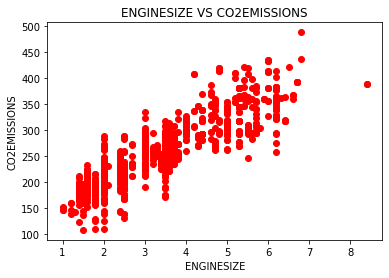

In [ ]:
plt.scatter(sdf.ENGINESIZE , sdf.CO2EMISSIONS , color = 'red')
plt.title('ENGINESIZE VS CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

## 4. Train/Test Split

In [ ]:
mdf = np.random.rand(len(df)) < 0.8
test = sdf[mdf]
train = sdf[mdf]
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


## 5. Polynomial Regression
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta_1  x + \theta_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**? 
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

polyfect = PolynomialFeatures(degree=2)
train_x_poly = polyfect.fit_transform(train_x)

train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$$y = b + \theta_1  x_1 + \theta_2 x_2$$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 

so we can use **LinearRegression()** function to solve it:


In [ ]:
lin_model = linear_model.LinearRegression()
y_ = lin_model.fit(train_x_poly , train_y)

print('Slope {}'.format(lin_model.coef_))
print('Intercept {}'.format(lin_model.intercept_))

Slope [[ 0.         48.26989134 -1.20900346]]
Intercept [110.27203674]


## <u>Visualizing</u>

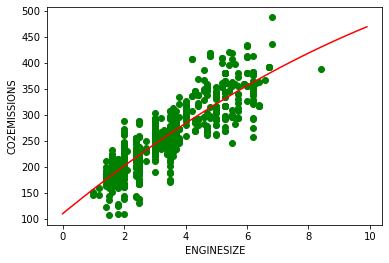

In [ ]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color = 'green')

X = np.arange(0.0,10.0 , 0.1)
Y = lin_model.intercept_[0] + lin_model.coef_[0][1]*X + lin_model.coef_[0][2]*np.power(X , 2)

plt.plot(X , Y , '-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

## 6. Evaluation

In [ ]:
from sklearn.metrics import r2_score

test_x_poly = polyfect.fit_transform(test_x)
test_y_ = lin_model.predict(test_x_poly)

print('Mean Absolute Error: {}'.format(np.mean(np.absolute(test_y_ - test_y))))
print('Mean Square Error: {}'.format(np.mean((test_y_ - test_y)**2)))
print('R2 Score: {}'.format(r2_score(test_y_ , test_y)))

Mean Absolute Error: 23.57992511285826
Mean Square Error: 976.6098757907587
R2 Score: 0.6733561180559112
